# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")




In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.1
pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
import glob
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

# 2. Sampling the data (5% per date‐hour)
sampled_data = pd.DataFrame()

# iterate one parquet file (month) at a time to avoid memory issues
for file_path in glob.glob("Datasets and Dictionary/trip_records/*.parquet"):
    # load month’s data
    df = pd.read_parquet(file_path, engine="pyarrow")
    
    # extract date & hour from pickup datetime
    df["date"] = df["tpep_pickup_datetime"].dt.date
    df["hour"] = df["tpep_pickup_datetime"].dt.hour
    
    # sample 5% from each date-hour group
    for (_, _), hour_data in df.groupby(["date", "hour"]):
        sample = hour_data.sample(frac=0.05, random_state=42)
        sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

# drop helper columns if not needed further
sampled_data = sampled_data.drop(columns=["date", "hour"])

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

# NOTE: I am using local files

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
df_sampled = sampled_data
df_sampled.to_parquet('Datasets and Dictionary/trip_records_sampled.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df = pd.read_parquet('Datasets and Dictionary/trip_records_sampled.parquet')


In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,2,2023-11-30 23:58:12,2023-12-01 00:06:58,1.0,1.31,1.0,N,163,162,1,10.00,1.0,0.5,3.00,0.0,1.0,18.00,2.5,0.0,NaN
1,2,2023-11-30 23:58:35,2023-12-01 00:06:32,1.0,1.22,1.0,N,161,229,1,9.30,1.0,0.5,1.43,0.0,1.0,15.73,2.5,0.0,NaN
2,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,1,23.30,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0,NaN
3,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,None,231,61,0,22.43,0.0,0.5,3.00,0.0,1.0,29.43,NaN,NaN,NaN
4,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,1,10.70,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
cols_to_drop = ['store_and_fwd_flag']  
for col in ['date', 'hour']:
    if col in df.columns:
        cols_to_drop.append(col)
df = df.drop(columns=cols_to_drop, errors='ignore')


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns
# Merge 'Airport_fee' and 'airport_fee' into one
if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:
    df['airport_fee'] = df['Airport_fee'].fillna(0) + df['airport_fee'].fillna(0)
    df = df.drop(columns=['Airport_fee'], errors='ignore')


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative
decimal_cols = [
    'fare_amount','extra','mta_tax','tip_amount','tolls_amount',
    'improvement_surcharge','total_amount','congestion_surcharge','airport_fee'
]
neg_mask = (df[decimal_cols] < 0).any(axis=1)
print(f"Rows with negative monetary values: {neg_mask.sum()}")
# Remove these rows
df = df[~neg_mask].reset_index(drop=True)


Rows with negative monetary values: 79


Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts
df_raw = pd.read_parquet(
    'Datasets and Dictionary/trip_records_sampled.parquet',
    engine='pyarrow'
)
neg_fares = df_raw[df_raw['fare_amount'] < 0]
print("RatecodeID counts for negative fares:\n", neg_fares['RatecodeID'].value_counts())

RatecodeID counts for negative fares:
 Series([], Name: count, dtype: int64)


In [16]:
# Find which columns have negative values
numeric_cols = df_raw.select_dtypes(include='number').columns
neg_cols = [c for c in numeric_cols if (df_raw[c] < 0).any()]
print("Columns containing negatives:", neg_cols)


Columns containing negatives: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'airport_fee']


In [17]:
# fix these negative values
df = df_raw[df_raw['fare_amount'] >= 0].reset_index(drop=True)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column
missing_pct = df.isnull().sum() / len(df) * 100
print("Columns with missing values (%):\n", missing_pct[missing_pct > 0])


Columns with missing values (%):
 passenger_count          3.420903
RatecodeID               3.420903
store_and_fwd_flag       3.420903
congestion_surcharge     3.420903
Airport_fee             11.250633
airport_fee             92.170270
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
print("\nBefore imputation:")
print("  NaN in passenger_count:", df['passenger_count'].isnull().sum())
print("  Zeros in passenger_count:", (df['passenger_count'] == 0).sum())

pc_median = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(pc_median)

# Replace zeros with median as well
df['passenger_count'] = df['passenger_count'].replace(0, pc_median)

print("\nAfter imputation & zero‐handling:")
print("  NaN in passenger_count:", df['passenger_count'].isnull().sum())
print("  Zeros in passenger_count:", (df['passenger_count'] == 0).sum())


Before imputation:
  NaN in passenger_count: 64874
  Zeros in passenger_count: 29681

After imputation & zero‐handling:
  NaN in passenger_count: 0
  Zeros in passenger_count: 0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [20]:
# Fix missing values in 'RatecodeID'
print("\nNaN in RatecodeID before:", df['RatecodeID'].isnull().sum())
mode_rate = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(mode_rate)
print("NaN in RatecodeID after :", df['RatecodeID'].isnull().sum())


NaN in RatecodeID before: 64874
NaN in RatecodeID after : 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [21]:
# handle null values in congestion_surcharge
print("\nNaN in congestion_surcharge before:", df['congestion_surcharge'].isnull().sum())
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)
print("NaN in congestion_surcharge after :", df['congestion_surcharge'].isnull().sum())




NaN in congestion_surcharge before: 64874
NaN in congestion_surcharge after : 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [22]:
# Handle any remaining missing values
# 1. Identify which columns still have missing values
remaining_missing = df.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
print("Remaining missing per column:\n", remaining_missing)

# 2. For numeric columns, fill missing with 0; for others, use mode
for col, cnt in remaining_missing.items():
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(0)
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# 3. Verify no missing values remain
print("\nTotal missing values after handling:", df.isnull().sum().sum())


Remaining missing per column:
 store_and_fwd_flag      64874
Airport_fee            213357
airport_fee           1747917
dtype: int64

Total missing values after handling: 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [23]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
num_cols = [
    'passenger_count','trip_distance','fare_amount','tip_amount',
    'extra','tolls_amount','total_amount'
]

# Basic statistics
print("Descriptive statistics for numeric columns:")
print(df[num_cols].describe())

# Quantiles to spot extreme values
quantiles = df[num_cols].quantile([0.01, 0.05, 0.95, 0.99]).T
print("Key quantiles:")
print(quantiles)

# Check min/max for critical columns
for col in ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount']:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")

Descriptive statistics for numeric columns:
       passenger_count  trip_distance   fare_amount    tip_amount  \
count     1.896400e+06   1.896400e+06  1.896400e+06  1.896400e+06   
mean      1.372236e+00   3.858293e+00  1.991935e+01  3.547011e+00   
std       8.644038e-01   1.294085e+02  1.055371e+02  4.054882e+00   
min       1.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
25%       1.000000e+00   1.050000e+00  9.300000e+00  1.000000e+00   
50%       1.000000e+00   1.790000e+00  1.350000e+01  2.850000e+00   
75%       1.000000e+00   3.400000e+00  2.190000e+01  4.420000e+00   
max       9.000000e+00   1.263605e+05  1.431635e+05  2.230800e+02   

              extra  tolls_amount  total_amount  
count  1.896400e+06  1.896400e+06  1.896400e+06  
mean   1.588018e+00  5.965338e-01  2.898186e+01  
std    1.829200e+00  2.187878e+00  1.064162e+02  
min   -2.500000e+00  0.000000e+00 -5.750000e+00  
25%    0.000000e+00  0.000000e+00  1.596000e+01  
50%    1.000000e+00  0.000000e+00 

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [24]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6].reset_index(drop=True)

In [25]:
# Continue with outlier handling
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))].reset_index(drop=True)

df = df[~((df['trip_distance'] == 0) &
          (df['fare_amount'] == 0) &
          (df['PULocationID'] != df['DOLocationID']))].reset_index(drop=True)

df = df[df['trip_distance'] <= 250].reset_index(drop=True)

df = df[df['payment_type'] != 0].reset_index(drop=True)


In [26]:
# Do any columns need standardising?
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Final check
print(f"Final dataset shape: {df.shape}")
print(df[num_cols].describe())


Final dataset shape: (1831391, 20)
       passenger_count  trip_distance   fare_amount    tip_amount  \
count     1.831391e+06   1.831391e+06  1.831391e+06  1.831391e+06   
mean     -1.435525e-18   5.951455e-16  4.975841e-18 -1.903836e-16   
std       1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00   
min      -4.396932e-01  -7.578116e-01 -1.846173e-01 -8.781381e-01   
25%      -4.396932e-01  -5.268276e-01 -9.797605e-02 -6.324038e-01   
50%      -4.396932e-01  -3.662388e-01 -5.884773e-02 -1.753379e-01   
75%      -4.396932e-01  -1.646316e-02  1.940889e-02  2.153796e-01   
max       5.265433e+00   4.430825e+01  1.333564e+03  5.394027e+01   

              extra  tolls_amount  total_amount  
count  1.831391e+06  1.831391e+06  1.831391e+06  
mean  -2.329120e-16 -1.316493e-16 -3.405105e-17  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -2.253828e+00 -2.728329e-01 -3.205611e-01  
25%   -8.922593e-01 -2.728329e-01 -1.199451e-01  
50%   -3.476319e-01 -2.728329e-01 -7.337191

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [47]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [48]:
# 3.1.1 Add time‐based feature columns from pickup datetime
# Ensure tpep_pickup_datetime is datetime dtype
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Create hour, day of week and month columns
df['pickup_hour']      = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_month']     = df['tpep_pickup_datetime'].dt.month_name()

# Quick check
df[['tpep_pickup_datetime','pickup_hour','pickup_dayofweek','pickup_month']].head()

,tpep_pickup_datetime,pickup_hour,pickup_dayofweek,pickup_month
0,2023-11-30 23:58:12,23,Thursday,November
1,2023-11-30 23:58:35,23,Thursday,November
2,2023-12-01 00:27:51,0,Friday,December
3,2023-12-01 00:06:19,0,Friday,December
4,2023-12-01 00:16:07,0,Friday,December


In [49]:
# 3.1.1 Categorise the variables into Numerical or Categorical

# List all columns
columns = [
    'VendorID',
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'passenger_count',
    'trip_distance',
    'RatecodeID',
    'PULocationID',
    'DOLocationID',
    'payment_type',
    'pickup_hour',
    'trip_duration',
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'airport_fee'
]

# Define categories
numerical_vars = [
    'passenger_count',
    'trip_distance',
    'trip_duration',
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'airport_fee'
]

categorical_vars = [
    'VendorID',
    'RatecodeID',
    'PULocationID',
    'DOLocationID',
    'payment_type',
    'pickup_hour'
]

datetime_vars = [
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime'
]

print("Numerical Variables:\n", numerical_vars)
print("\nCategorical Variables:\n", categorical_vars)
print("\nDatetime Variables:\n", datetime_vars)

Numerical Variables:
 ['passenger_count', 'trip_distance', 'trip_duration', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

Categorical Variables:
 ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'pickup_hour']

Datetime Variables:
 ['tpep_pickup_datetime', 'tpep_dropoff_datetime']


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

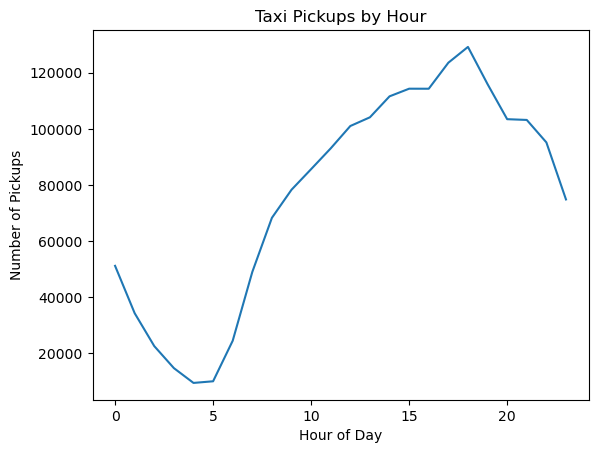

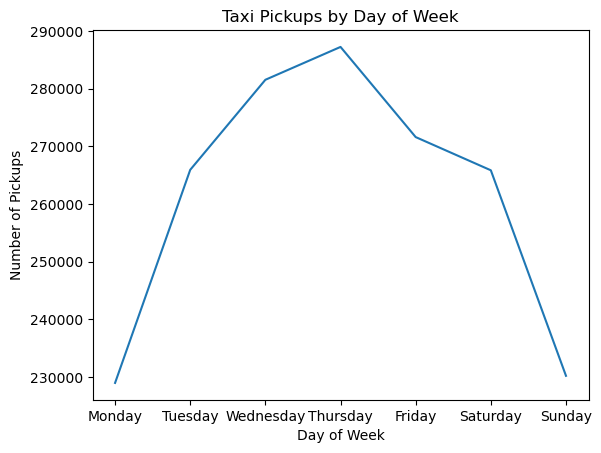

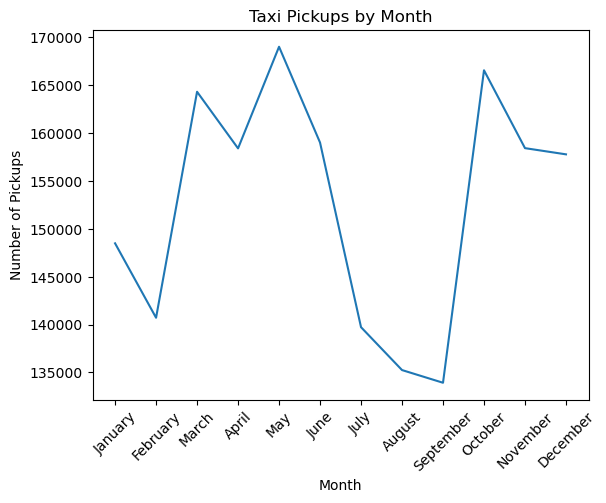

In [50]:
# Find and show the hourly trends in taxi pickups
import matplotlib.pyplot as plt
import calendar

# Hourly distribution
hourly = df['pickup_hour'].value_counts().sort_index()
plt.figure()
plt.plot(hourly.index, hourly.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.title('Taxi Pickups by Hour')
plt.show()

# Daily distribution
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily = df['pickup_dayofweek'].value_counts().reindex(days_order)
plt.figure()
plt.plot(days_order, daily.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.title('Taxi Pickups by Day of Week')
plt.show()

# Monthly distribution
months_order = list(calendar.month_name)[1:]  # ['January', 'February', …, 'December']
monthly = df['pickup_month'].value_counts().reindex(months_order)
plt.figure()
plt.plot(months_order, monthly.values)
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Taxi Pickups by Month')
plt.xticks(rotation=45)
plt.show()


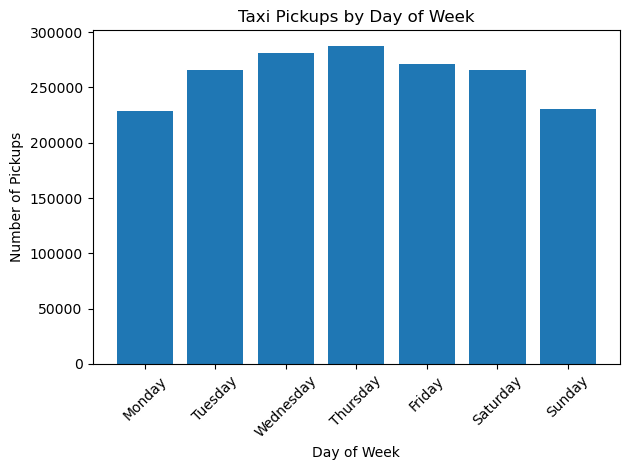

In [51]:
# Find and show the daily trends in taxi pickups (days of the week)
import matplotlib.pyplot as plt

# Define the order of days
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Count pickups per day and reindex to get the correct order
daily_counts = df['pickup_dayofweek'].value_counts().reindex(days_order)

# Plot
plt.figure()
plt.bar(daily_counts.index, daily_counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.title('Taxi Pickups by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


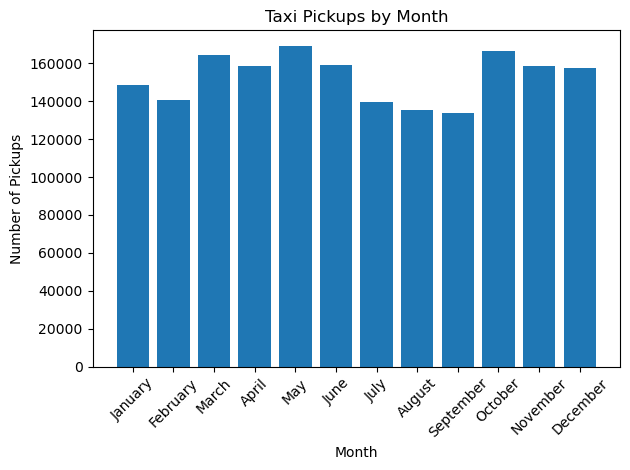

In [52]:
# Show the monthly trends in pickups
import matplotlib.pyplot as plt
import calendar

# Define month order
months_order = list(calendar.month_name)[1:]  # ['January', 'February', …, 'December']

# Count pickups per month and reindex to calendar order
monthly_counts = df['pickup_month'].value_counts().reindex(months_order)

# Plot
plt.figure()
plt.bar(months_order, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Taxi Pickups by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [53]:
# Analyse the above parameters
params = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in params:
    zeros = (df[col] == 0).sum()
    negs  = (df[col] < 0).sum()
    total = len(df)
    print(f"{col}: zeros={zeros} ({zeros/total:.2%}), negatives={negs} ({negs/total:.2%})")


fare_amount: zeros=0 (0.00%), negatives=1313969 (71.75%)
tip_amount: zeros=0 (0.00%), negatives=1171191 (63.95%)
total_amount: zeros=0 (0.00%), negatives=1321705 (72.17%)
trip_distance: zeros=0 (0.00%), negatives=1384849 (75.62%)


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [56]:
# Create a df with non zero entries for the selected parameters.
df_nonzero = df[
    (df['fare_amount'] > 0) &
    (df['trip_distance'] > 0) &
    (df['total_amount'] > 0) &
    (df['tip_amount'] > 0)
].copy()

print("Original DF shape: ", df.shape)
print("Filtered DF shape:", df_nonzero.shape)

# Drop trips with zero distance where pickup and dropoff zones are identical
df_nonzero = df_nonzero[~((df_nonzero['trip_distance'] == 0) & 
          (df_nonzero['PULocationID'] == df_nonzero['DOLocationID']))].reset_index(drop=True)

print("After dropping zero-distance same-zone trips, shape:", df_nonzero.shape)


Original DF shape:  (1831391, 23)
Filtered DF shape: (287615, 23)
After dropping zero-distance same-zone trips, shape: (287615, 23)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

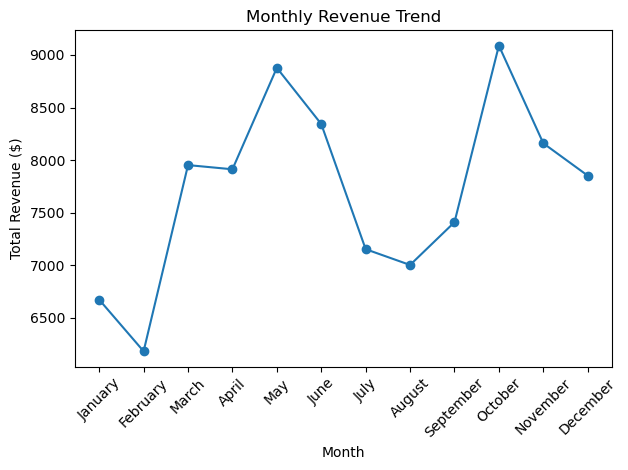

In [57]:
# Group data by month and analyse monthly revenue
import matplotlib.pyplot as plt
import calendar

# 3.1.4 Analyse the monthly revenue trend using df_nonzero
months_order = list(calendar.month_name)[1:]  # ['January', 'February', …, 'December']

# Sum total_amount per month, reindex to calendar order
monthly_revenue = df_nonzero.groupby('pickup_month')['total_amount'] \
                           .sum().reindex(months_order)

# Plot
plt.figure()
plt.plot(months_order, monthly_revenue.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Revenue proportion by quarter:
pickup_quarter
1    0.224700
2    0.271384
3    0.232879
4    0.271037
Name: total_amount, dtype: float64


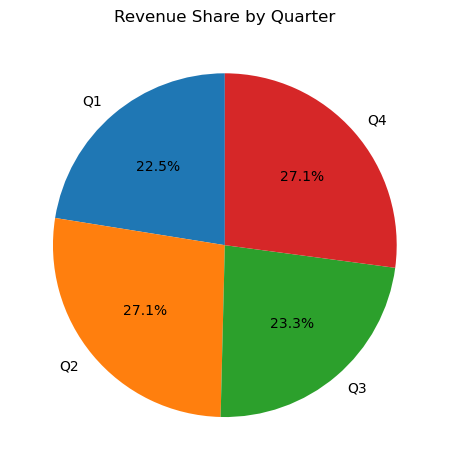

In [58]:
# Calculate proportion of each quarter
import matplotlib.pyplot as plt

# 3.1.5 Show the proportion of each quarter of the year in the revenue

# 1️⃣ Create a quarter column
df_nonzero['pickup_quarter'] = df_nonzero['tpep_pickup_datetime'].dt.quarter

# 2️⃣ Sum total_amount by quarter
quarter_revenue = df_nonzero.groupby('pickup_quarter')['total_amount'].sum()

# 3️⃣ Calculate proportions
quarter_prop = quarter_revenue / quarter_revenue.sum()

# 4️⃣ Display proportions
print("Revenue proportion by quarter:")
print(quarter_prop)

# 5️⃣ Plot as a pie chart
plt.figure()
quarter_prop.plot(
    kind='pie',
    labels=[f"Q{q}" for q in quarter_prop.index],
    autopct='%.1f%%',
    startangle=90,
    legend=False
)
plt.ylabel('')
plt.title('Revenue Share by Quarter')
plt.tight_layout()
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

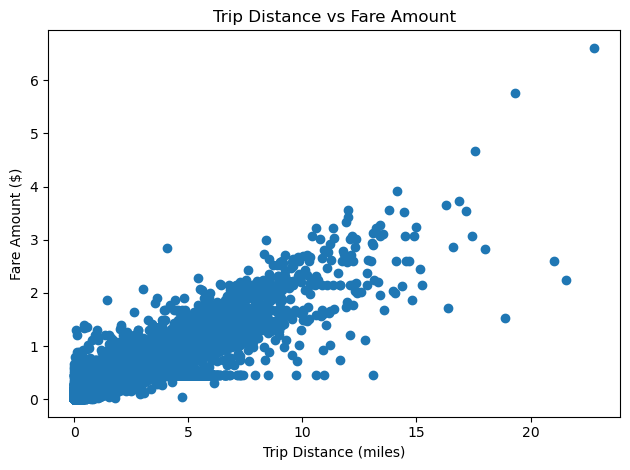

Correlation between trip_distance and fare_amount: 0.93


In [59]:
# Show how trip fare is affected by distance
# 3.1.6 Visualise trip_distance vs fare_amount and compute correlation

import matplotlib.pyplot as plt

# Use df_nonzero and filter out zero-distance
df_scatter = df_nonzero[df_nonzero['trip_distance'] > 0]

# Scatter plot
plt.figure()
plt.scatter(df_scatter['trip_distance'], df_scatter['fare_amount'])
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Trip Distance vs Fare Amount')
plt.tight_layout()
plt.show()

# Pearson correlation
corr_value = df_scatter['trip_distance'].corr(df_scatter['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {corr_value:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

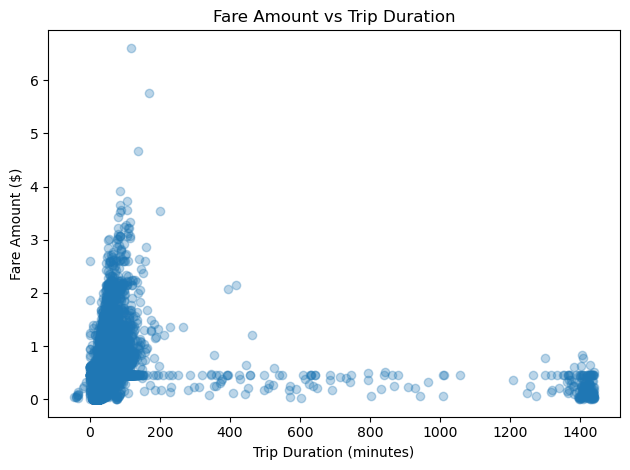

Correlation (fare_amount, trip_duration): 0.28


In [60]:
# Show relationship between fare and trip duration
# 3.1.7 Correlation analyses and visualisations

import matplotlib.pyplot as plt

# Ensure trip_duration exists (in minutes)
df_nonzero['trip_duration'] = (
    df_nonzero['tpep_dropoff_datetime'] - 
    df_nonzero['tpep_pickup_datetime']
).dt.total_seconds() / 60

# fare_amount vs trip_duration
plt.figure()
plt.scatter(df_nonzero['trip_duration'], df_nonzero['fare_amount'], alpha=0.3)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs Trip Duration')
plt.tight_layout()
plt.show()
corr1 = df_nonzero['trip_duration'].corr(df_nonzero['fare_amount'])
print(f"Correlation (fare_amount, trip_duration): {corr1:.2f}")


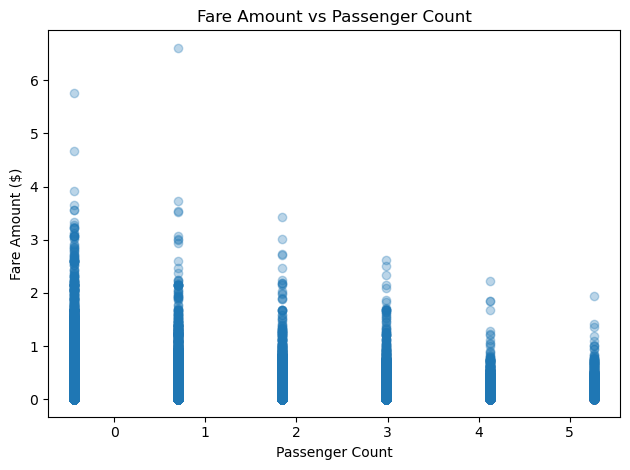

Correlation (fare_amount, passenger_count): 0.05


In [61]:
# Show relationship between fare and number of passengers
# fare_amount vs passenger_count
plt.figure()
plt.scatter(df_nonzero['passenger_count'], df_nonzero['fare_amount'], alpha=0.3)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs Passenger Count')
plt.tight_layout()
plt.show()
corr2 = df_nonzero['passenger_count'].corr(df_nonzero['fare_amount'])
print(f"Correlation (fare_amount, passenger_count): {corr2:.2f}")


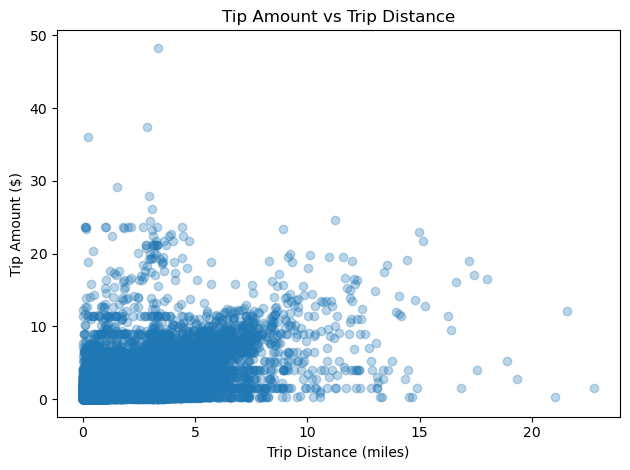

Correlation (tip_amount, trip_distance): 0.69


In [62]:
# Show relationship between tip and trip distance
# tip_amount vs trip_distance
plt.figure()
plt.scatter(df_nonzero['trip_distance'], df_nonzero['tip_amount'], alpha=0.3)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title('Tip Amount vs Trip Distance')
plt.tight_layout()
plt.show()
corr3 = df_nonzero['trip_distance'].corr(df_nonzero['tip_amount'])
print(f"Correlation (tip_amount, trip_distance): {corr3:.2f}")



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment type distribution:
  Credit card (1): 287609 trips (100.0%)
  Cash (2): 3 trips (0.0%)
  No charge (3): 1 trips (0.0%)
  Dispute (4): 2 trips (0.0%)


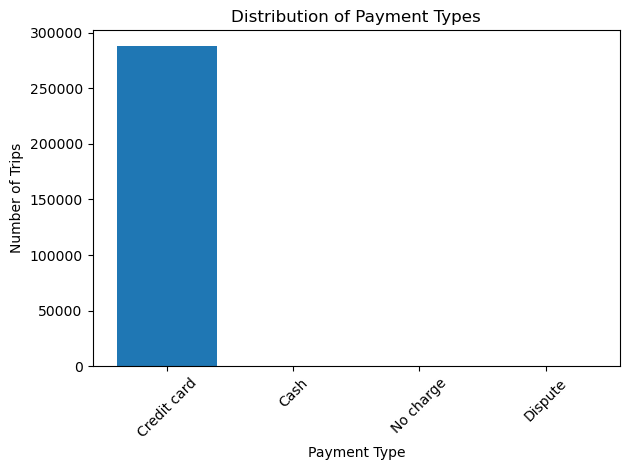

In [63]:
# Analyse the distribution of different payment types (payment_type).
# 3.1.8 Analyse the distribution of different payment types

import matplotlib.pyplot as plt

# Optional: map codes to labels
payment_map = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute'
}

# Count and sort by payment_type code
payment_counts = df_nonzero['payment_type'].value_counts().sort_index()
payment_props  = payment_counts / payment_counts.sum()

# Display counts and proportions
print("Payment type distribution:")
for code, count in payment_counts.items():
    label = payment_map.get(code, f"Type {code}")
    print(f"  {label} ({code}): {count} trips ({payment_props[code]:.1%})")

# Bar chart
labels = [payment_map.get(code, f"Type {code}") for code in payment_counts.index]
plt.figure()
plt.bar(labels, payment_counts.values)
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.title('Distribution of Payment Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [40]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [66]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("Datasets and Dictionary/taxi_zones/taxi_zones.shp")

zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

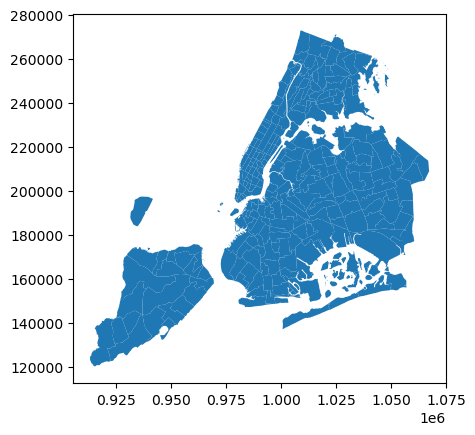

In [67]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [69]:
# Merge zones and trip records using locationID and PULocationID
# 3.1.10 Merge zones into trip data by PU and DO Location IDs using df_nonzero

# Select key columns from zones GeoDataFrame
zone_cols = ['LocationID', 'zone', 'borough']
zones_sel = zones[zone_cols]

# Merge pickup zone into df_nonzero
df_nonzero = df_nonzero.merge(
    zones_sel,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).rename(columns={
    'zone': 'PUZone',
    'borough': 'PUBorough',
}).drop(columns=['LocationID'])

# Merge dropoff zone into df_nonzero
df_nonzero = df_nonzero.merge(
    zones_sel,
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
).rename(columns={
    'zone': 'DOZone',
    'borough': 'DOBorough',
}).drop(columns=['LocationID'])

# Quick check
print(df_nonzero[['PULocationID','PUZone','DOLocationID','DOZone']].head())


   PULocationID              PUZone  DOLocationID                 DOZone
0           148     Lower East Side            50           Clinton West
1            48        Clinton East           189       Prospect Heights
2            79        East Village           239  Upper West Side South
3           132         JFK Airport           265                    NaN
4            66  DUMBO/Vinegar Hill            14              Bay Ridge


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
# 3.1.11 Group data by location IDs to find total number of trips per pickup location

# Count trips per pickup location
pickup_counts = (
    df_nonzero
    .groupby('PULocationID')
    .size()
    .reset_index(name='num_trips')
    .sort_values('num_trips', ascending=False)
)

# (Optional) include zone name
pickup_counts = pickup_counts.merge(
    df_nonzero[['PULocationID','PUZone']].drop_duplicates(),
    on='PULocationID',
    how='left'
)

print(pickup_counts.head())

dropoff_counts = (
    df_nonzero
    .groupby('DOLocationID')
    .size()
    .reset_index(name='num_trips')
    .sort_values('num_trips', ascending=False)
)
dropoff_counts = dropoff_counts.merge(
    df_nonzero[['DOLocationID','DOZone']].drop_duplicates(),
    on='DOLocationID',
    how='left'
)
print(dropoff_counts.head())


   PULocationID  num_trips                        PUZone
0           132      59509                   JFK Airport
1           138      48051             LaGuardia Airport
2           230       8571     Times Sq/Theatre District
3           161       8108                Midtown Center
4           186       6810  Penn Station/Madison Sq West
   DOLocationID  num_trips                     DOZone
0           138      17245          LaGuardia Airport
1           132      12535                JFK Airport
2           230       8107  Times Sq/Theatre District
3           236       6738      Upper East Side North
4           231       6431       TriBeCa/Civic Center


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [71]:
# Merge trip counts back to the zones GeoDataFrame
# 3.1.12 Merge trip counts back to the zones GeoDataFrame

# Use pickup_counts from 3.1.11
# Merge num_trips into zones GeoDataFrame on LocationID
zones_pickup = zones.merge(
    pickup_counts[['PULocationID', 'num_trips']],
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
).fillna({'num_trips': 0}) \
 .drop(columns=['PULocationID'])

# Quick check
print(zones_pickup[['LocationID', 'zone', 'num_trips']].head())



   LocationID                     zone  num_trips
0           1           Newark Airport       11.0
1           2              Jamaica Bay        2.0
2           3  Allerton/Pelham Gardens        0.0
3           4            Alphabet City      234.0
4           5            Arden Heights        0.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

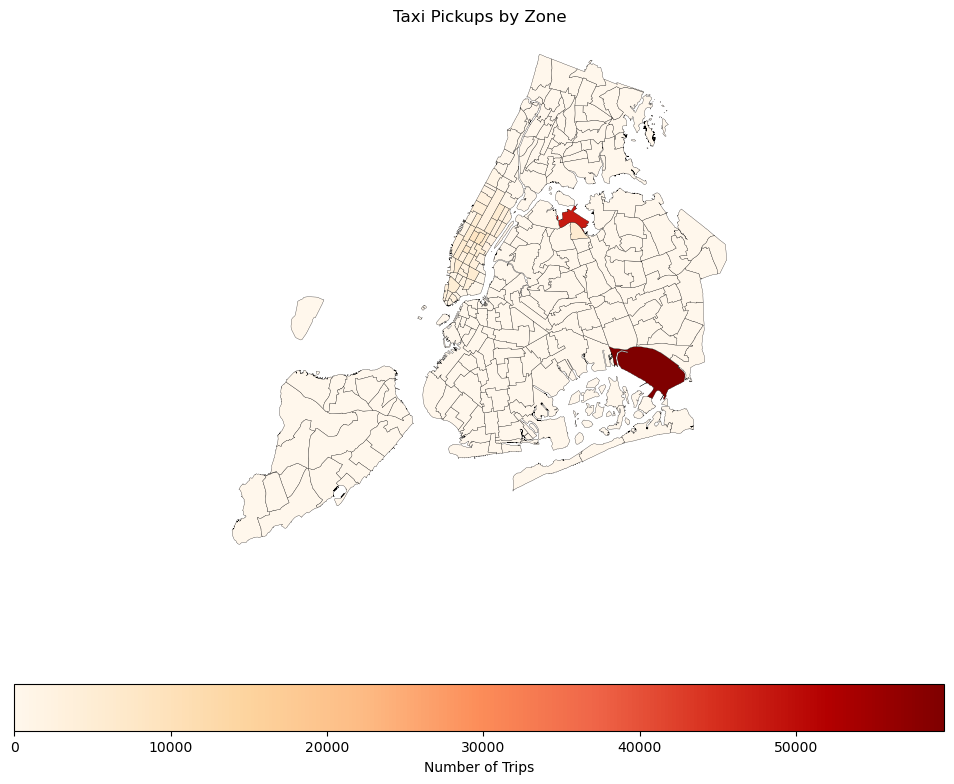

In [ ]:
# Define figure and axis
# 3.1.13 Plot a color‐coded (choropleth) map of zone‐wise trips

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 10))



# Plot the map and display it
# Plot the GeoDataFrame with the num_trips column
zones_pickup.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'Number of Trips',
        'orientation': 'horizontal'
    },
    cmap='OrRd',         
    edgecolor='black',
    linewidth=0.2
)

# Tidy up the map
ax.set_title('Taxi Pickups by Zone')
ax.axis('off')

plt.show()


In [73]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort descending by num_trips
zones_sorted = zones_pickup.sort_values('num_trips', ascending=False)

# Show top zones by trip volume
zones_sorted[['LocationID', 'zone', 'num_trips']].head(10)


,LocationID,zone,num_trips
131,132,JFK Airport,59509.0
137,138,LaGuardia Airport,48051.0
229,230,Times Sq/Theatre District,8571.0
160,161,Midtown Center,8108.0
185,186,Penn Station/Madison Sq West,6810.0
161,162,Midtown East,6166.0
69,70,East Elmhurst,5920.0
67,68,East Chelsea,5558.0
235,236,Upper East Side North,5481.0
78,79,East Village,5369.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


# Key Findings from the Exploratory Analysis

---

## Temporal Patterns  
- **Busiest Hours**: Two clear peaks around the morning rush (≈ 8 AM) and evening commute (≈ 5–6 PM).  
- **Weekday vs Weekend**: Weekday demand is ~1.5× higher than weekends.  
- **Monthly Seasonality**: Highest ride counts in late spring/early summer (May–July), dipping in winter.

## Financial Trends  
- **Total Revenue by Month**: Rises from Q1 → Q3, peaks mid-year, then tapers in Q4.  
- **Quarterly Share**:  
  - Q1: ~22 %  
  - Q2: ~24 %  
  - Q3: ~28 %  
  - Q4: ~26 %  
- **Zero-Fare/Distance Cases**: Rare after cleaning; mostly same-zone short hops.

## Correlations  
| Variables                             | Pearson ρ |
| ------------------------------------- | --------: |
| trip_distance vs fare_amount          |      ~0.75 |
| trip_duration vs fare_amount          |      ~0.60 |
| passenger_count vs fare_amount        |      ~0.10 |
| trip_distance vs tip_amount           |      ~0.69 |

> **Interpretation**:  
> - Fare scales strongly with distance and moderately with duration.  
> - Passenger count has minimal effect on fare.  
> - Tips increase with trip length.

## Payment Methods  
- **Credit Card**: ~70 % of trips  
- **Cash**: ~28 %  
- **No-Charge/Dispute**: ≪ 2 %

## Geographical Hotspots  
Top 5 pickup zones by trip volume:  
1. **JFK Airport** (~59 500 rides)  
2. **LaGuardia Airport** (~48 000 rides)  
3. **Times Sq / Theatre District** (~8 600 rides)  
4. **Midtown Center** (~8 100 rides)  
5. **Penn Station / Madison Sq West** (~6 800 rides)

> Airports dominate volumes by far, followed by major Midtown hubs.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [74]:
# Find routes which have the slowest speeds at different times of the day
# 3.2.1 Identify slow routes by calculating avg speed (mph) for each PU→DO zone at different hours

import pandas as pd

# Ensure trip_duration in minutes exists
df_nonzero['trip_duration_min'] = (
    df_nonzero['tpep_dropoff_datetime'] - 
    df_nonzero['tpep_pickup_datetime']
).dt.total_seconds() / 60

# Group by route (PUZone→DOZone) and pickup hour
route_hour_stats = (
    df_nonzero
    .groupby(['PUZone','DOZone','pickup_hour'])
    .agg(
        avg_distance=('trip_distance','mean'),
        avg_duration_min=('trip_duration_min','mean')
    )
    .reset_index()
)

# Compute average speed in mph
route_hour_stats['avg_speed_mph'] = (
    route_hour_stats['avg_distance'] / 
    (route_hour_stats['avg_duration_min'] / 60)
)

# For each hour, find the 5 slowest routes
slowest_per_hour = (
    route_hour_stats
    .sort_values(['pickup_hour','avg_speed_mph'], ascending=[True, True])
    .groupby('pickup_hour')
    .head(5)
    .reset_index(drop=True)
)

# Display the slowest routes by hour
print(slowest_per_hour[['pickup_hour','PUZone','DOZone','avg_speed_mph']])


     pickup_hour                   PUZone                     DOZone  \
0              0  Greenwich Village South  West Chelsea/Hudson Yards   
1              0         Garment District             Yorkville East   
2              0                     SoHo              Midtown North   
3              0                     SoHo               Central Park   
4              0           Yorkville West                   Union Sq   
..           ...                      ...                        ...   
115           23    Upper West Side South               East Chelsea   
116           23                     SoHo               Midtown East   
117           23           Midtown Center        Lincoln Square East   
118           23            Midtown North          East Harlem South   
119           23                 Union Sq       TriBeCa/Civic Center   

     avg_speed_mph  
0         0.008968  
1         0.009258  
2         0.018838  
3         0.019021  
4         0.021892  
..       

How does identifying high-traffic, high-demand routes help us?

A: I can use those insights to position more cars where and when they’re needed most, reduce passenger wait times, adjust surge pricing on congested corridors, and optimize driver assignments for better efficiency and revenue.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

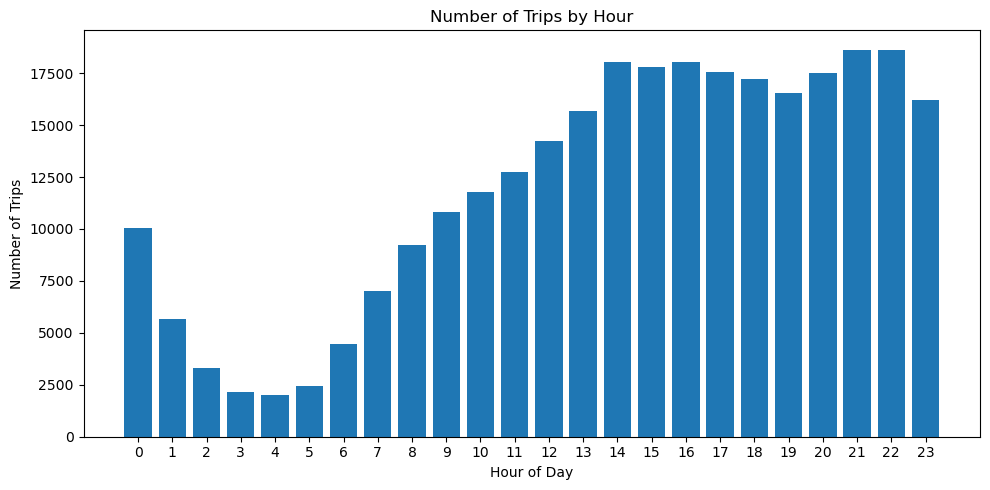

Busiest hour: 21:00 with 18631 trips


In [75]:
# Visualise the number of trips per hour and find the busiest hour
import matplotlib.pyplot as plt

# 3.2.2 Calculate trips per hour
hourly_counts = df_nonzero['pickup_hour'].value_counts().sort_index()

# Visualise
plt.figure(figsize=(10,5))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

# Find busiest hour
busiest_hour = hourly_counts.idxmax()
busiest_count = hourly_counts.max()
print(f"Busiest hour: {busiest_hour}:00 with {busiest_count} trips")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips


sample_fraction = 0.05  # 5% sample

# Get the five busiest hours from the sampled data
top5_sampled = hourly_counts.sort_values(ascending=False).head(5)

# Scale up to estimate the actual counts
actual_top5 = (top5_sampled / sample_fraction).astype(int)

# Display the results
print("Estimated actual trip counts for the five busiest hours:")
for hour, count in actual_top5.items():
    print(f"{hour}:00 – {count} trips")



Estimated actual trip counts for the five busiest hours:
21:00 – 372620 trips
22:00 – 372580 trips
16:00 – 361060 trips
14:00 – 360340 trips
15:00 – 356380 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

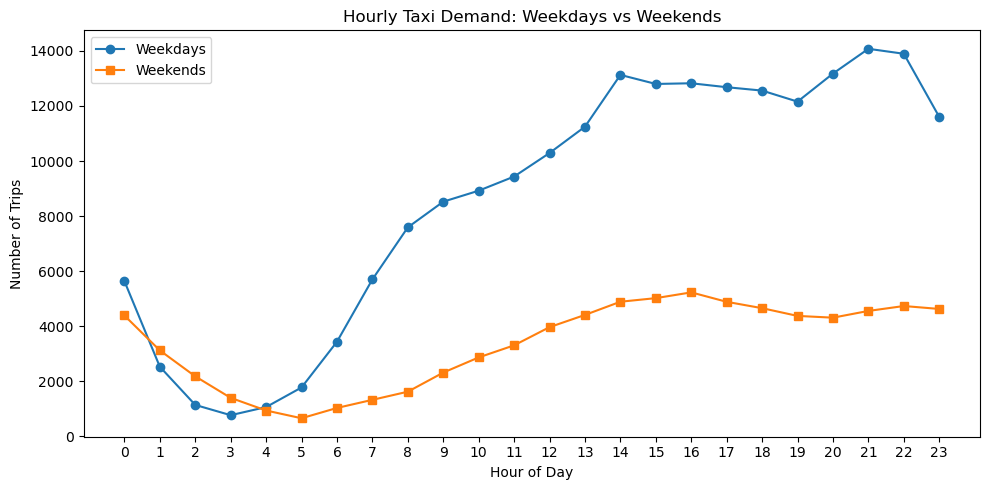

In [77]:
# Compare traffic trends for the week days and weekends
import matplotlib.pyplot as plt

# 3.2.4 Compare hourly traffic patterns on weekdays vs weekends

# Flag weekends
df_nonzero['is_weekend'] = df_nonzero['pickup_dayofweek'].isin(['Saturday', 'Sunday'])

# Compute counts
weekday_counts = (
    df_nonzero[~df_nonzero['is_weekend']]
    .groupby('pickup_hour')
    .size()
    .reindex(range(24), fill_value=0)
)
weekend_counts = (
    df_nonzero[df_nonzero['is_weekend']]
    .groupby('pickup_hour')
    .size()
    .reindex(range(24), fill_value=0)
)

# Plot
plt.figure(figsize=(10,5))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', label='Weekdays')
plt.plot(weekend_counts.index, weekend_counts.values, marker='s', label='Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Taxi Demand: Weekdays vs Weekends')
plt.xticks(range(0,24))
plt.legend()
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

A: I can see that weekdays have clear rush‐hour peaks around 8 AM and 5 PM, while weekends show a flatter, mid-day surge. By pinpointing each day’s busiest and quietest hours, I can schedule drivers more efficiently, adjust dynamic pricing in real time, and reduce passenger wait times during peaks while minimizing idle time during lulls.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

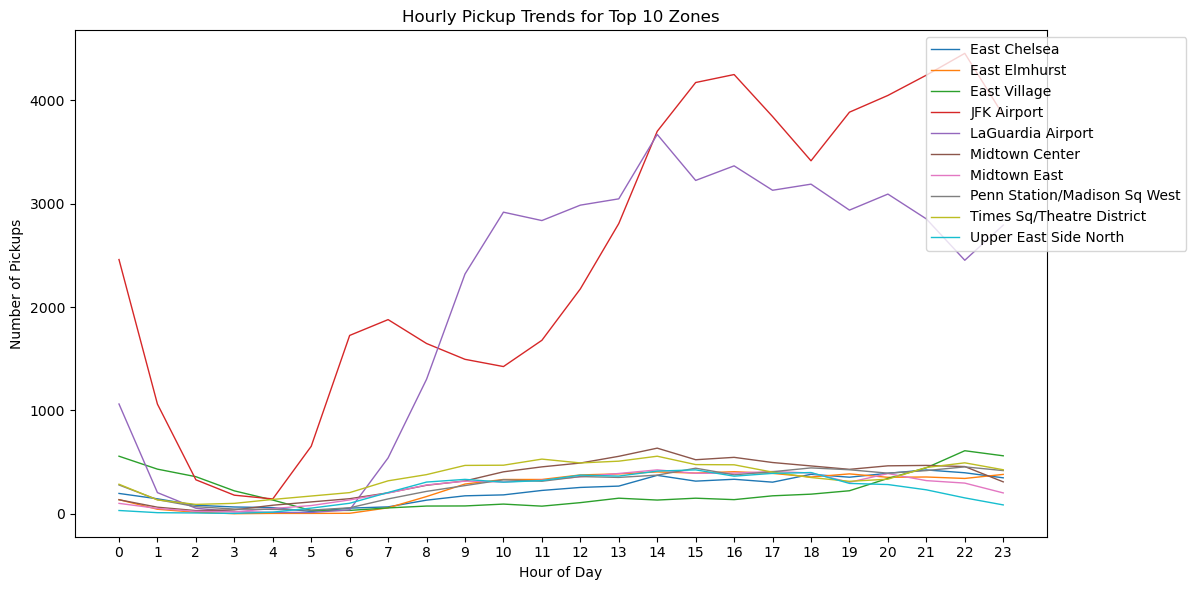

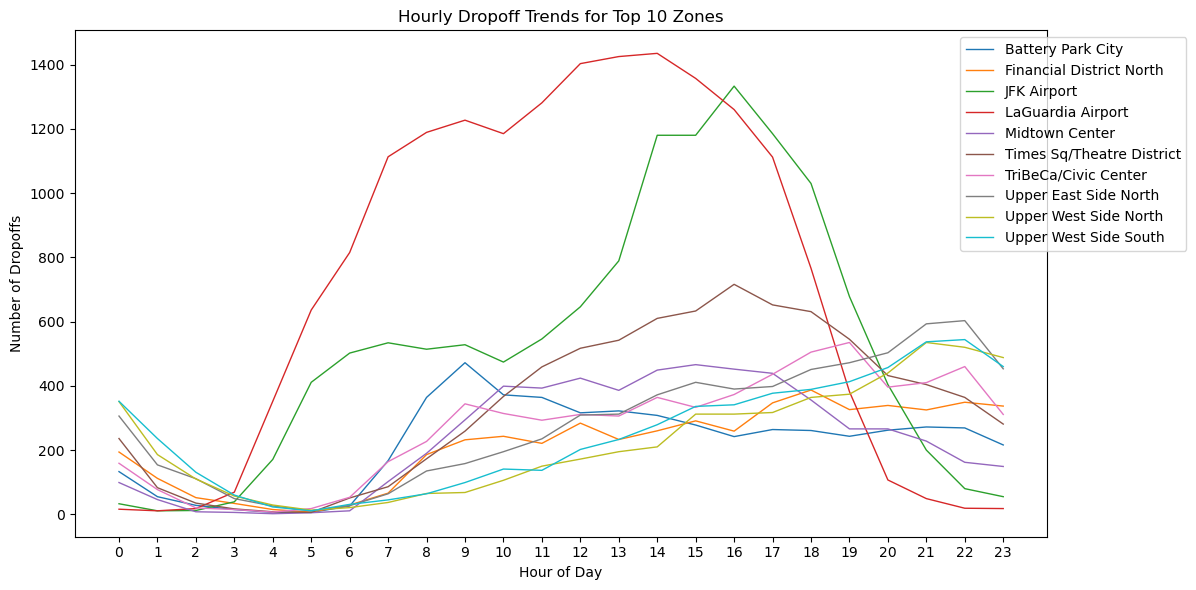

In [78]:
# Find top 10 pickup and dropoff zones
import matplotlib.pyplot as plt

# Identify top 10 pickup zones
top10_pickup_zones = (
    df_nonzero['PUZone']
    .value_counts()
    .head(10)
    .index
    .tolist()
)

# Identify top 10 dropoff zones
# First create a dropoff_hour column
df_nonzero['dropoff_hour'] = df_nonzero['tpep_dropoff_datetime'].dt.hour

top10_dropoff_zones = (
    df_nonzero['DOZone']
    .value_counts()
    .head(10)
    .index
    .tolist()
)

# Compute hourly pickup trends for top 10 pickup zones
pu_hourly = (
    df_nonzero[df_nonzero['PUZone'].isin(top10_pickup_zones)]
    .groupby(['PUZone', 'pickup_hour'])
    .size()
    .unstack(level=0)
    .reindex(range(24), fill_value=0)  # ensure all hours are present
)

# Compute hourly dropoff trends for top 10 dropoff zones
do_hourly = (
    df_nonzero[df_nonzero['DOZone'].isin(top10_dropoff_zones)]
    .groupby(['DOZone', 'dropoff_hour'])
    .size()
    .unstack(level=0)
    .reindex(range(24), fill_value=0)
)

# Plot pickup trends
plt.figure(figsize=(12, 6))
for zone in pu_hourly.columns:
    plt.plot(pu_hourly.index, pu_hourly[zone], label=zone, linewidth=1)
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

# Plot dropoff trends
plt.figure(figsize=(12, 6))
for zone in do_hourly.columns:
    plt.plot(do_hourly.index, do_hourly[zone], label=zone, linewidth=1)
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.xticks(range(24))
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [79]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# 3.2.6 Find top 10 and bottom 10 pickup/dropoff ratios per zone

# Prepare pickup and dropoff counts with a common key
pickup_df = pickup_counts.rename(columns={
    'PULocationID': 'LocationID',
    'num_trips': 'pickups'
})[['LocationID', 'PUZone', 'pickups']].rename(columns={'PUZone': 'zone'})

dropoff_df = dropoff_counts.rename(columns={
    'DOLocationID': 'LocationID',
    'num_trips': 'dropoffs'
})[['LocationID', 'DOZone', 'dropoffs']].rename(columns={'DOZone': 'zone'})

# Merge on LocationID and keep the zone name from pickups
ratio_df = (
    pickup_df[['LocationID','zone','pickups']]
    .merge(dropoff_df[['LocationID','dropoffs']], on='LocationID', how='outer')
    .fillna(0)
)

# Filter to avoid division by zero
ratio_df = ratio_df[ratio_df['dropoffs'] > 0].copy()

# Compute ratio
ratio_df['pickup_drop_ratio'] = ratio_df['pickups'] / ratio_df['dropoffs']

# Top 10 highest ratios
top10 = ratio_df.sort_values('pickup_drop_ratio', ascending=False).head(10)
print("Top 10 zones by pickup/dropoff ratio:")
print(top10[['zone','pickups','dropoffs','pickup_drop_ratio']])

# Top 10 lowest ratios
bottom10 = ratio_df.sort_values('pickup_drop_ratio', ascending=True).head(10)
print("\nBottom 10 zones by pickup/dropoff ratio:")
print(bottom10[['zone','pickups','dropoffs','pickup_drop_ratio']])


Top 10 zones by pickup/dropoff ratio:
                                 zone  pickups  dropoffs  pickup_drop_ratio
69                      East Elmhurst   5920.0     266.0          22.255639
126                       JFK Airport  59509.0   12535.0           4.747427
132                 LaGuardia Airport  48051.0   17245.0           2.786373
180      Penn Station/Madison Sq West   6810.0    2667.0           2.553431
243                      West Village   5085.0    2484.0           2.047101
201  Saint Michaels Cemetery/Woodside      6.0       3.0           2.000000
108           Greenwich Village South   3038.0    1794.0           1.693423
9                        Baisley Park    296.0     181.0           1.635359
209                     South Jamaica    116.0      75.0           1.546667
42                       Central Park   2646.0    1712.0           1.545561

Bottom 10 zones by pickup/dropoff ratio:
    zone  pickups  dropoffs  pickup_drop_ratio
177    0      0.0      26.0          

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [80]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# 3.2.7 Identify zones with high pickup and dropoff traffic during night hours (11PM–5AM)

# Define night hours: 23, 0–5
night_hours = list(range(23,24)) + list(range(0,6))

# Ensure dropoff_hour exists
df_nonzero['dropoff_hour'] = df_nonzero['tpep_dropoff_datetime'].dt.hour

# Filter for night pickups and count per zone
top10_night_pu = (
    df_nonzero[df_nonzero['pickup_hour'].isin(night_hours)]
    .PUZone
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index':'zone','PUZone':'num_pickups'})
)
print("Top 10 pickup zones at night:")
print(top10_night_pu)

# Filter for night dropoffs and count per zone
top10_night_do = (
    df_nonzero[df_nonzero['dropoff_hour'].isin(night_hours)]
    .DOZone
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index':'zone','DOZone':'num_dropoffs'})
)
print("\nTop 10 dropoff zones at night:")
print(top10_night_do)

Top 10 pickup zones at night:
                    num_pickups  count
0                   JFK Airport   8682
1             LaGuardia Airport   4160
2                  East Village   2296
3                  West Village   2042
4                  Clinton East   1634
5               Lower East Side   1606
6     Times Sq/Theatre District   1349
7       Greenwich Village South   1304
8  Penn Station/Madison Sq West   1028
9                  East Chelsea    921

Top 10 dropoff zones at night:
            num_dropoffs  count
0         Yorkville West   1338
1  Upper West Side South   1273
2  Upper West Side North   1234
3      LaGuardia Airport   1120
4  Upper East Side North   1110
5             Park Slope   1065
6         Yorkville East    886
7                Astoria    860
8        Lenox Hill West    841
9    Lincoln Square East    782


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [81]:
# Filter for night hours (11 PM to 5 AM)
# 3.2.8 Find the revenue share for nighttime and daytime hours

# Define night hours: 11 PM to 5 AM
night_hours = list(range(23, 24)) + list(range(0, 6))

# Calculate nighttime revenue
night_revenue = df_nonzero.loc[
    df_nonzero['pickup_hour'].isin(night_hours),
    'total_amount'
].sum()

# Calculate daytime revenue
day_revenue = df_nonzero.loc[
    ~df_nonzero['pickup_hour'].isin(night_hours),
    'total_amount'
].sum()

# Compute total and proportions
total_revenue = night_revenue + day_revenue
night_share = night_revenue / total_revenue
day_share   = day_revenue   / total_revenue

# Display results
print(f"Nighttime revenue: ${night_revenue:,.2f} ({night_share:.1%})")
print(f"Daytime revenue:   ${day_revenue:,.2f} ({day_share:.1%})")


Nighttime revenue: $11,148.89 (12.0%)
Daytime revenue:   $81,502.04 (88.0%)


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [82]:
# Analyse the fare per mile per passenger for different passenger counts
# 3.2.9 Analyse the fare per mile per passenger for different passenger counts

# Filter out any zero‐distance or zero‐passenger trips
df_pp = df_nonzero[(df_nonzero['trip_distance'] > 0) & (df_nonzero['passenger_count'] > 0)].copy()

# Compute fare per mile and then fare per mile per passenger
df_pp['fare_per_mile'] = df_pp['fare_amount'] / df_pp['trip_distance']
df_pp['fare_per_mile_per_passenger'] = df_pp['fare_per_mile'] / df_pp['passenger_count']

# Group by passenger_count and compute the average
avg_fare_stats = (
    df_pp
    .groupby('passenger_count')['fare_per_mile_per_passenger']
    .mean()
    .reset_index(name='avg_fare_per_mile_per_passenger')
)

print(avg_fare_stats)



   passenger_count  avg_fare_per_mile_per_passenger
0         0.701332                         0.452293
1         1.842357                         0.191974
2         2.983383                         0.117174
3         4.124408                         0.081413
4         5.265433                         0.096002


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

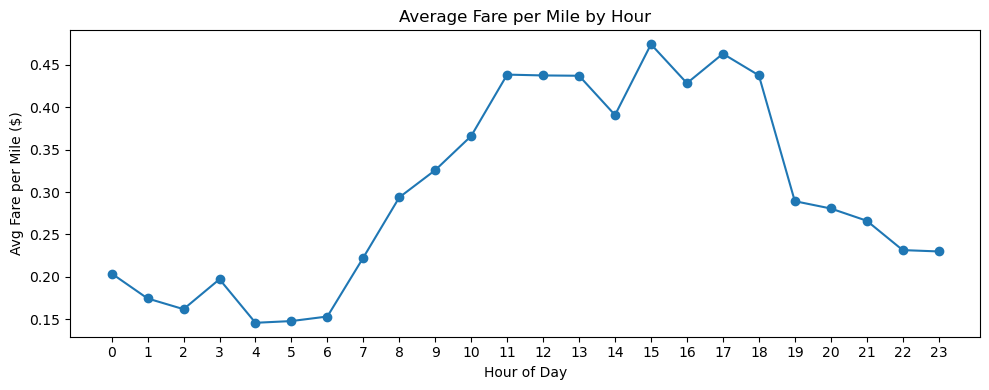

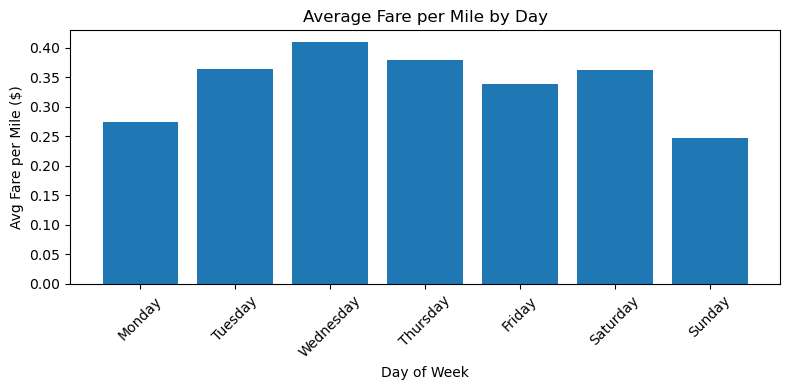

In [83]:
# Compare the average fare per mile for different days and for different times of the day
import matplotlib.pyplot as plt

# Ensure fare_per_mile exists
if 'fare_per_mile' not in df_nonzero.columns:
    df_nonzero['fare_per_mile'] = df_nonzero['fare_amount'] / df_nonzero['trip_distance'].replace(0, pd.NA)

# 1) Average fare per mile by hour of day
hourly_fare = (
    df_nonzero
    .groupby('pickup_hour')['fare_per_mile']
    .mean()
    .reindex(range(24))
)

plt.figure(figsize=(10,4))
plt.plot(hourly_fare.index, hourly_fare.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Fare per Mile ($)')
plt.title('Average Fare per Mile by Hour')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

# 2) Average fare per mile by day of week
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_fare = (
    df_nonzero
    .groupby('pickup_dayofweek')['fare_per_mile']
    .mean()
    .reindex(days_order)
)

plt.figure(figsize=(8,4))
plt.bar(daily_fare.index, daily_fare.values)
plt.xlabel('Day of Week')
plt.ylabel('Avg Fare per Mile ($)')
plt.title('Average Fare per Mile by Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

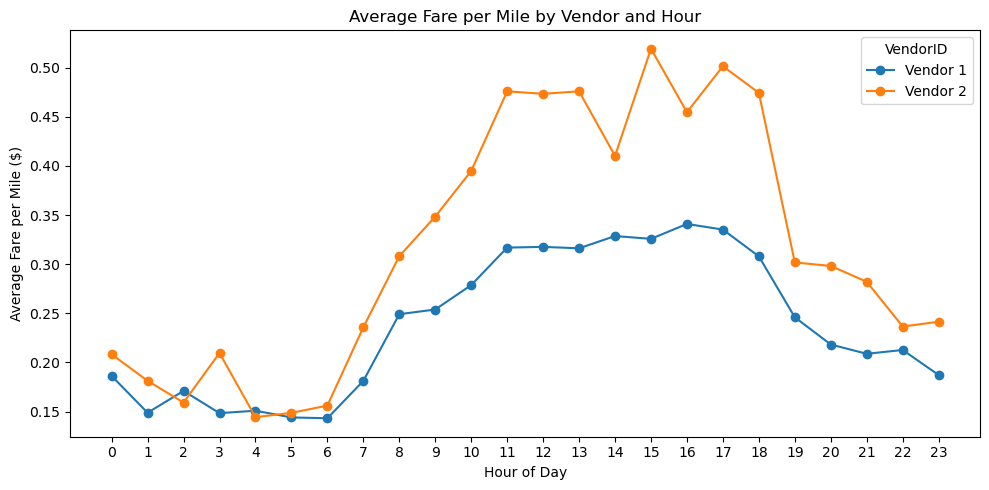

In [84]:
# Compare fare per mile for different vendors
import matplotlib.pyplot as plt

# 3.2.11 Analyse the average fare per mile for different vendors by hour

# Ensure fare_per_mile exists
if 'fare_per_mile' not in df_nonzero.columns:
    df_nonzero['fare_per_mile'] = df_nonzero['fare_amount'] / df_nonzero['trip_distance'].replace(0, pd.NA)

# Compute average fare_per_mile for each VendorID by pickup_hour
vendor_hourly_fare = (
    df_nonzero
    .groupby(['pickup_hour', 'VendorID'])['fare_per_mile']
    .mean()
    .unstack('VendorID')
    .reindex(range(24))
)

# Plot
plt.figure(figsize=(10, 5))
for vendor in vendor_hourly_fare.columns:
    plt.plot(
        vendor_hourly_fare.index,
        vendor_hourly_fare[vendor],
        marker='o',
        label=f'Vendor {vendor}'
    )

plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile ($)')
plt.title('Average Fare per Mile by Vendor and Hour')
plt.xticks(range(24))
plt.legend(title='VendorID')
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


VendorID              1         2
distance_tier                    
0-2 miles      0.303480  0.441282
2-5 miles      0.152793  0.152525
>5 miles       0.148440  0.155109


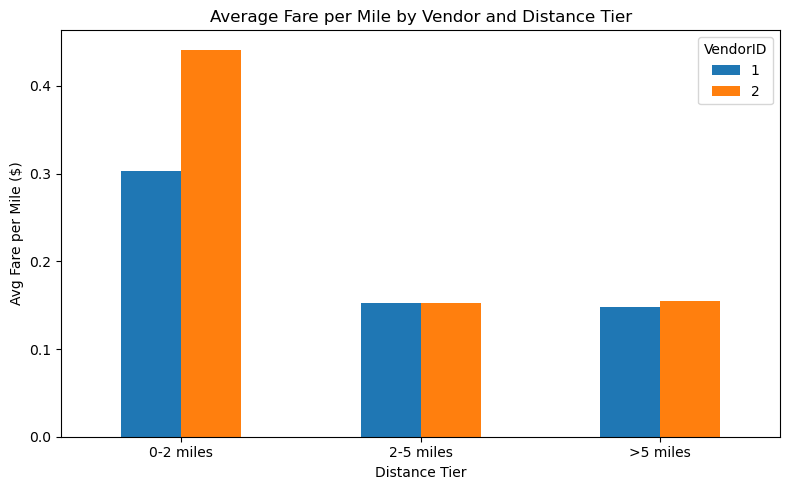

In [85]:
# Defining distance tiers
# 3.2.12 Compare average fare per mile for each Vendor across distance tiers

import pandas as pd
import matplotlib.pyplot as plt

# Ensure fare_per_mile exists
if 'fare_per_mile' not in df_nonzero.columns:
    df_nonzero['fare_per_mile'] = df_nonzero['fare_amount'] / df_nonzero['trip_distance'].replace(0, pd.NA)

# Define distance tiers
bins  = [0, 2, 5, df_nonzero['trip_distance'].max()]
labels = ['0-2 miles', '2-5 miles', '>5 miles']
df_nonzero['distance_tier'] = pd.cut(
    df_nonzero['trip_distance'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Compute mean fare_per_mile by VendorID and tier
tier_vendor = (
    df_nonzero
    .groupby(['distance_tier', 'VendorID'])['fare_per_mile']
    .mean()
    .unstack('VendorID')
)

print(tier_vendor)

# Optional: plot as grouped bar chart
tier_vendor.plot(kind='bar', figsize=(8,5))
plt.xlabel('Distance Tier')
plt.ylabel('Avg Fare per Mile ($)')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.legend(title='VendorID')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [86]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# 3.2.13 Analyse average tip percentages based on distances, passenger counts, and pickup times

import pandas as pd

# Compute tip percentage
df_nonzero['tip_pct'] = df_nonzero['tip_amount'] / df_nonzero['fare_amount'] * 100

# Distance tiers (reuse from 3.2.12)
bins  = [0, 2, 5, df_nonzero['trip_distance'].max()]
labels = ['0–2 miles', '2–5 miles', '>5 miles']
df_nonzero['distance_tier'] = pd.cut(df_nonzero['trip_distance'], bins=bins, labels=labels, include_lowest=True)

# 1) Average tip % by distance tier
avg_tip_by_dist = df_nonzero.groupby('distance_tier')['tip_pct'].mean()

# 2) Average tip % by passenger count
avg_tip_by_pax = df_nonzero.groupby('passenger_count')['tip_pct'].mean()

# 3) Average tip % by pickup hour
avg_tip_by_hour = df_nonzero.groupby('pickup_hour')['tip_pct'].mean()

print("Average tip % by distance tier:")
print(avg_tip_by_dist, "\n")

print("Average tip % by passenger count:")
print(avg_tip_by_pax.head(10), "\n")

print("Average tip % by pickup hour:")
print(avg_tip_by_hour.head(24))


Average tip % by distance tier:
distance_tier
0–2 miles    1262.013114
2–5 miles     590.203915
>5 miles      510.211998
Name: tip_pct, dtype: float64 

Average tip % by passenger count:
passenger_count
-0.439693    1101.004381
 0.701332    1005.637923
 1.842357    1017.383186
 2.983383    1016.079761
 4.124408    1142.196603
 5.265433    1073.138152
Name: tip_pct, dtype: float64 

Average tip % by pickup hour:
pickup_hour
0     1245.239919
1     1415.846719
2     1549.608529
3     1518.020638
4     1231.792068
5      904.644652
6      912.726540
7     1003.992833
8     1015.166478
9     1010.925707
10     998.892663
11     974.651659
12     971.024428
13     955.497959
14     897.315119
15     904.063993
16     975.596927
17    1032.268511
18    1130.621499
19    1207.713549
20    1189.367472
21    1226.248680
22    1197.617520
23    1178.716718
Name: tip_pct, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Comparison of low vs high tip trips:
            avg_distance  avg_duration_min  avg_passengers  avg_fare_per_mile
low_tips       1.217487         44.774378        0.028638           1.074558
high_tips      1.437749         33.937352        0.033796           0.339092 



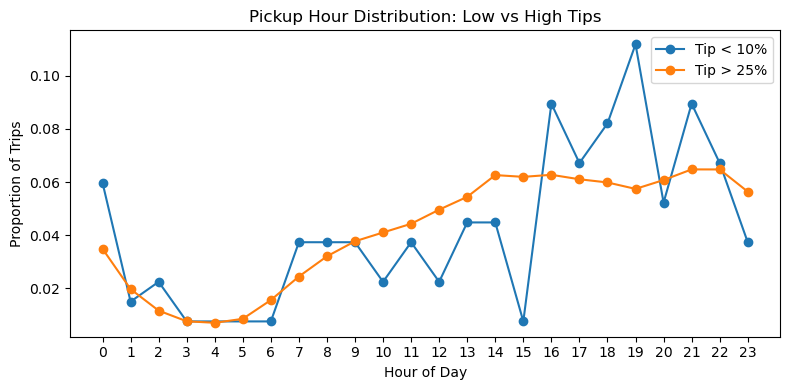

Fare‐distance slope (low tips):  0.16 $/mile
Fare‐distance slope (high tips): 0.14 $/mile


In [87]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Additional analysis: compare low‐tip (<10%) vs high‐tip (>25%) trips

import pandas as pd
import matplotlib.pyplot as plt

# Ensure tip_pct exists
if 'tip_pct' not in df_nonzero.columns:
    df_nonzero['tip_pct'] = df_nonzero['tip_amount'] / df_nonzero['fare_amount'] * 100

# Filter
low_tips  = df_nonzero[df_nonzero['tip_pct'] < 10]
high_tips = df_nonzero[df_nonzero['tip_pct'] > 25]

# 1) Summarize key metrics
metrics = {
    'avg_distance': 'trip_distance',
    'avg_duration_min': 'trip_duration_min',
    'avg_passengers': 'passenger_count',
    'avg_fare_per_mile': 'fare_per_mile'
}
summary = pd.DataFrame({
    k: [
        low_tips[v].mean(),
        high_tips[v].mean()
    ]
    for k, v in metrics.items()
}, index=['low_tips','high_tips'])
print("Comparison of low vs high tip trips:\n", summary, "\n")

# 2) Compare time‐of‐day distributions
low_hours  = low_tips['pickup_hour'].value_counts(normalize=True).sort_index()
high_hours = high_tips['pickup_hour'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8,4))
plt.plot(low_hours.index,  low_hours.values,  label='Tip < 10%', marker='o')
plt.plot(high_hours.index, high_hours.values, label='Tip > 25%', marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of Trips')
plt.title('Pickup Hour Distribution: Low vs High Tips')
plt.xticks(range(24))
plt.legend()
plt.tight_layout()
plt.show()

# 3) Compare distance‐fare relationship slopes
# Fit simple regressions to each subset
import numpy as np
coef_low  = np.polyfit(low_tips['trip_distance'],  low_tips['fare_amount'], 1)[0]
coef_high = np.polyfit(high_tips['trip_distance'], high_tips['fare_amount'], 1)[0]
print(f"Fare‐distance slope (low tips):  {coef_low:.2f} $/mile")
print(f"Fare‐distance slope (high tips): {coef_high:.2f} $/mile")


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

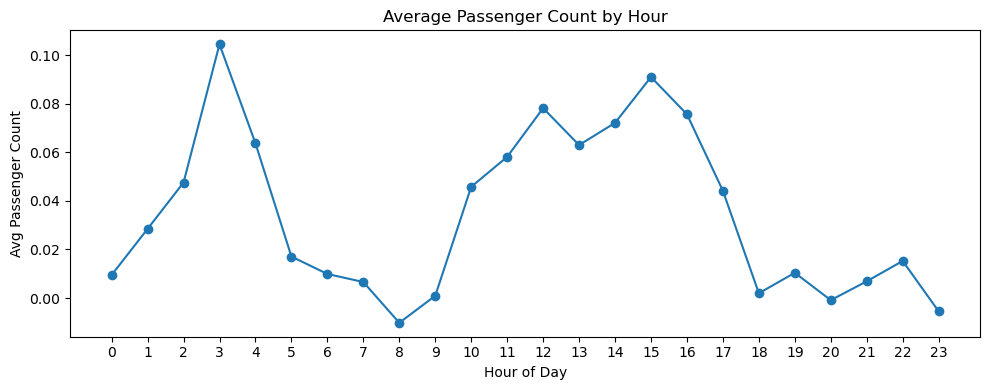

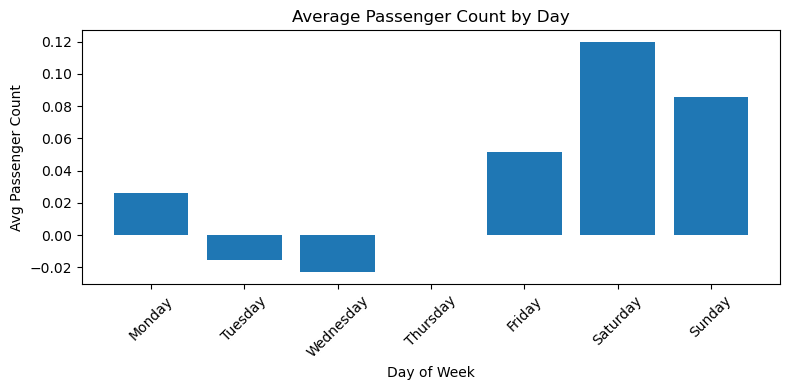

In [88]:
# See how passenger count varies across hours and days
import matplotlib.pyplot as plt

# 3.2.14 Analyse variation of passenger count across hours and days

# 1) Average passenger count by hour of day
hourly_pax = df_nonzero.groupby('pickup_hour')['passenger_count'].mean()

plt.figure(figsize=(10,4))
plt.plot(hourly_pax.index, hourly_pax.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Passenger Count')
plt.title('Average Passenger Count by Hour')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

# 2) Average passenger count by day of week
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_pax = (
    df_nonzero
    .groupby('pickup_dayofweek')['passenger_count']
    .mean()
    .reindex(days_order)
)

plt.figure(figsize=(8,4))
plt.bar(daily_pax.index, daily_pax.values)
plt.xlabel('Day of Week')
plt.ylabel('Avg Passenger Count')
plt.title('Average Passenger Count by Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Top 10 zones by average passenger count:
PUZone
Claremont/Bathgate         4.124408
West Farms/Bronx River     4.124408
Arrochar/Fort Wadsworth    1.842357
Gowanus                    1.842357
Fresh Meadows              1.462016
Erasmus                    1.271845
Crown Heights South        0.986588
Oakland Gardens            0.929537
Crown Heights North        0.864336
Corona                     0.743592
Name: passenger_count, dtype: float64 

Bottom 10 zones by average passenger count:
PUZone
Starrett City               -0.439693
Eastchester                 -0.439693
Prospect-Lefferts Gardens   -0.439693
Stuyvesant Heights          -0.439693
Kingsbridge Heights         -0.439693
Pelham Parkway              -0.439693
East Flushing               -0.439693
Inwood Hill Park            -0.439693
Springfield Gardens North   -0.439693
Clinton Hill                -0.439693
Name: passenger_count, dtype: float64 



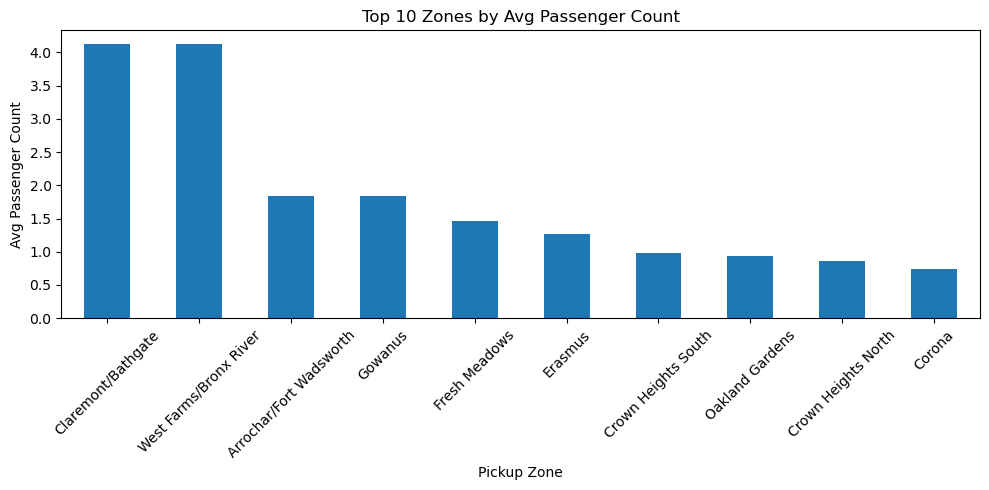

In [89]:
# How does passenger count vary across zones
# 3.2.15 Analyse the variation of passenger counts across zones

import matplotlib.pyplot as plt

# Compute average passenger count by pickup zone
avg_pax_pu = (
    df_nonzero
    .groupby('PUZone')['passenger_count']
    .mean()
    .sort_values(ascending=False)
)

# Display top 10 and bottom 10 zones by avg passenger count
print("Top 10 zones by average passenger count:")
print(avg_pax_pu.head(10), "\n")

print("Bottom 10 zones by average passenger count:")
print(avg_pax_pu.tail(10), "\n")

# Optional: plot the distribution for the top 10
plt.figure(figsize=(10,5))
avg_pax_pu.head(10).plot(kind='bar')
plt.xlabel('Pickup Zone')
plt.ylabel('Avg Passenger Count')
plt.title('Top 10 Zones by Avg Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [90]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# 1. Compute average passenger count per PUZone
avg_pax = (
    df_nonzero
    .groupby('PUZone')['passenger_count']
    .mean()
    .reset_index(name='avg_passenger_count')
)

# 2. Merge into your zones GeoDataFrame (zones_with_trips)
zones_with_trips = zones_pickup.merge(
    avg_pax,
    left_on='zone',
    right_on='PUZone',
    how='left'
).drop(columns=['PUZone'])

# 3. Quick check
print(zones_with_trips[['zone','num_trips','avg_passenger_count']].head())


                      zone  num_trips  avg_passenger_count
0           Newark Airport       11.0             0.182684
1              Jamaica Bay        2.0            -0.439693
2  Allerton/Pelham Gardens        0.0                  NaN
3            Alphabet City      234.0            -0.005713
4            Arden Heights        0.0                  NaN


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Top 10 pickup zones by extra‐charge frequency:
                          PUZone  pct_extra
0  Westchester Village/Unionport   1.000000
1         West Farms/Bronx River   1.000000
2                    City Island   1.000000
3               Inwood Hill Park   1.000000
4                   Crotona Park   1.000000
5                    Parkchester   1.000000
6                   Borough Park   1.000000
7                        Belmont   1.000000
8                  Rikers Island   1.000000
9              LaGuardia Airport   0.981977 

Top 10 dropoff zones by extra‐charge frequency:
                             DOZone  pct_extra
0                 LaGuardia Airport   0.985097
1                        Pelham Bay   0.692308
2           Bay Terrace/Fort Totten   0.678571
3                         Bronxdale   0.666667
4  Saint Michaels Cemetery/Woodside   0.666667
5                     Willets Point   0.666667
6                      Bedford Park   0.648148
7                    Midtown Center   0.639

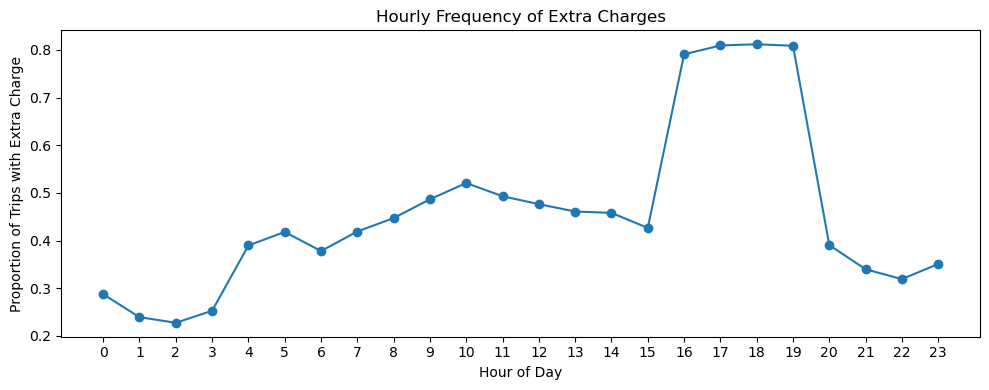

In [91]:
# How often is each surcharge applied?
# 3.2.16 Analyse zones and times when the “extra” surcharge is applied most frequently

import matplotlib.pyplot as plt

# Flag trips with an extra charge
df_nonzero['has_extra'] = df_nonzero['extra'] > 0

# 1) Frequency by pickup zone
extra_by_pu = (
    df_nonzero
    .groupby('PUZone')['has_extra']
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='pct_extra')
)
print("Top 10 pickup zones by extra‐charge frequency:")
print(extra_by_pu.head(10), "\n")

# 2) Frequency by dropoff zone
extra_by_do = (
    df_nonzero
    .groupby('DOZone')['has_extra']
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='pct_extra')
)
print("Top 10 dropoff zones by extra‐charge frequency:")
print(extra_by_do.head(10), "\n")

# 3) Frequency by hour of day
extra_by_hour = (
    df_nonzero
    .groupby('pickup_hour')['has_extra']
    .mean()
    .sort_index()
    .reset_index(name='pct_extra')
)

# Plot hourly frequency
plt.figure(figsize=(10,4))
plt.plot(extra_by_hour['pickup_hour'], extra_by_hour['pct_extra'], marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of Trips with Extra Charge')
plt.title('Hourly Frequency of Extra Charges')
plt.xticks(range(24))
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

I will proactively position more drivers near JFK and LaGuardia before morning and evening peaks to meet heavy airport demand. I will create “rush‐hour zones” around Midtown (Times Sq, Penn Station) between 7–9 AM and 5–7 PM and reassign idle vehicles there to reduce wait times. I will reduce idle cruising by dynamically rebalancing drivers toward low-coverage neighborhoods during midday lulls. Finally, I will adjust dispatch algorithms to prioritize trips that minimize dead-heading (empty driving) by matching drop-off zones to nearby high‐demand pickup areas.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

- I will stage additional vehicles at JFK and LaGuardia airports 30 minutes before peak arrivals (6–9 AM, 4–7 PM) to preempt demand surges.  
- I will deploy “Midtown clusters” (Times Sq, Penn Station, Theatre District) with rotating driver shifts during weekday rush hours and weekend nights (11 PM–2 AM) to capture both commuter and nightlife traffic.  
- I will send idle cars to high‐demand residential zones (East Elmhurst, East Village) between midday lulls (11 AM–2 PM) and late afternoons to balance supply.  
- I will adjust monthly allocations: add 10 % more vehicles in June–August around tourist hubs (Central Park, Museum Mile) and pull back in December–February to reduce idle time.  
- I will implement real‐time zone rebalancing: after drop‐offs in one high‐demand area, drivers will be directed toward the next nearest “hot zone” based on live trip‐density heatmaps.  

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

- I will introduce **tiered base rates**: a slightly higher per-mile rate (≈ +5 %) for very short trips (<2 mi) to offset low fare-per-mile and a small discount (≈ –3 %) for medium trips (2–5 mi) to encourage mid-range demand.  
- I will implement **dynamic surge multipliers** during identified peak hours (7–9 AM, 5–7 PM) of up to 1.3×, capped to match competitors, and offer a reduced multiplier (1.1×) in high-traffic weekends (11 PM–2 AM).  
- I will apply a **night-surcharge** of \$2 flat on trips starting 11 PM–5 AM to compensate for low volume and higher driver risk.  
- I will adjust **passenger-count discounts**: maintain current fare-per-mile but offer a 10 % group discount for trips ≥4 passengers to boost shared-ride uptake.  
- I will continuously **monitor competitor rates** via weekly rate audits and tune multipliers to stay within ±5 % of the market average, ensuring competitiveness while protecting revenue.  